# Visualization
---------------
## Matplot 그래프의 기본
### Matplotlib
- https://matplotlib.org/

#### Matplotlib의 특징:

- 다양한 그래프 유형: 
    - 선 그래프, 막대 그래프, 산점도, 히스토그램, 파이 차트 등 다양한 유형의 그래프를 생성할 수 있다.
- 설정 옵션 다양성: 
    - 그래프의 세부적인 요소를 커스터마이징하는 다양한 설정 옵션을 제공
- 다중 서브플롯: 
    - 하나의 그림 내에 여러 개의 서브플롯을 배치하여 복잡한 시각화를 생성할 수 있음
- 유연한 인터페이스: 
    - MATLAB 스타일의 인터페이스(Pyplot)를 제공하여 쉽게 그래프를 작성할 수 있음
- 대화식 및 스크립트 모드: 
    - 대화식 환경과 스크립트 모두에서 사용하기 용이하다.
- 다양한 출력 포맷: 
    - PNG, PDF, SVG 등 다양한 포맷으로 그래프를 저장할 수 있다.

#### 장점:

- 널리 사용되는 라이브러리: 
    - Matplotlib은 파이썬의 과학 및 공학 커뮤니티에서 널리 사용되며, 풍부한 자료와 지원이 존재
- 커스터마이징 가능: 
    - 그래프의 모든 요소를 직접 제어하여 원하는 디자인을 구현할 수 있다.
- 풍부한 문서화: 
    - 상세한 문서화와 예제가 풍부하게 제공되어 학습 및 문제 해결이 용이하다.
- 대화식 시각화: 
    - Jupyter 노트북과 같은 대화식 환경에서 그래프를 실시간으로 수정하고 탐색할 수 있음
#### 단점:

- 복잡한 그래프 작성 시 어려움: 
    - 복잡한 그래프를 작성할 때 Matplotlib의 기본 설정 만으로는 작업이 복잡해질 수 있음
- 시각적 디자인 한계: 
    - 기본적인 스타일링 옵션은 제한적이며, 더 고급적인 시각적 디자인은 추가 작업이 필요할 수 있다.
- 코드 복잡성 증가 가능성: 
    - 많은 설정을 직접 조정해야 할 경우 코드가 복잡해질 수 있다.

##### Anatomy of a Figure
- https://matplotlib.org/stable/gallery/showcase/anatomy.html

![Anatomy of a Figure](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png)

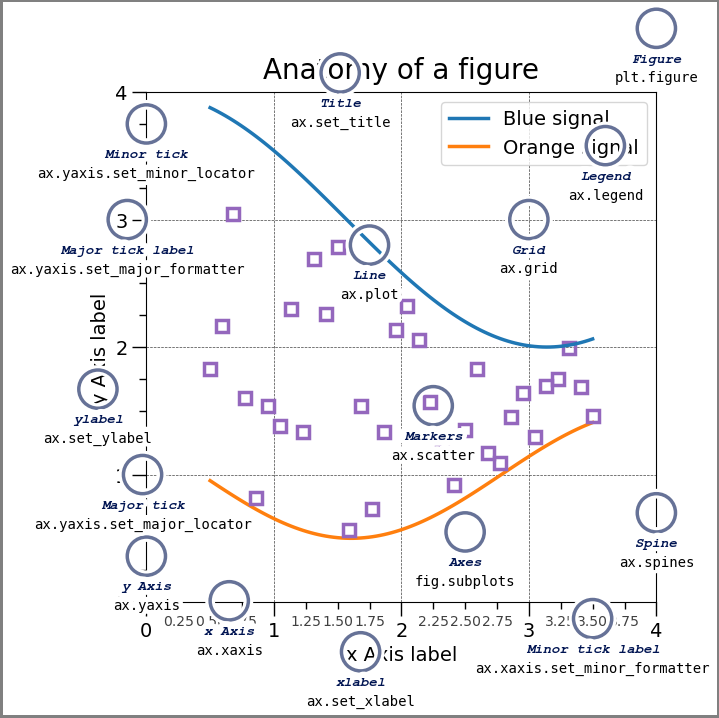

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

royal_blue = [0, 20/256, 82/256]

# make the figure

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], 
                  aspect=1)

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter("{x:.2f}")

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0, length=10, labelsize=14)
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10,
               labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10)
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal")
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9,
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x Axis label", fontsize=14)
ax.set_ylabel("y Axis label", fontsize=14)
ax.legend(loc="upper right", fontsize=14)


# Annotate the figure

def annotate(x, y, text, code):
    # Circle marker
    c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground='white')])
    ax.add_artist(c)

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
        color = 'white' if path_effects else royal_blue
        ax.text(x, y-0.2, text, zorder=100,
                ha='center', va='top', weight='bold', color=color,
                style='italic', fontfamily='Courier New',
                path_effects=path_effects)

        color = 'white' if path_effects else 'black'
        ax.text(x, y-0.33, code, zorder=100,
                ha='center', va='top', weight='normal', color=color,
                fontfamily='monospace', fontsize='medium',
                path_effects=path_effects)


annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor='0.5')
plt.show()

### Seaborn
- https://seaborn.pydata.org/

#### Seaborn 특징
- Seaborn은 파이썬 데이터 시각화 라이브러리로 Matplotlib 기반
- 통계적 시각화를 간편하게 만들어주는 고수준 인터페이스를 제공
- 색상 팔레트와 스타일링 기능으로 시각화 결과를 미리 설정할 수 있음
- 데이터프레임과 잘 연동되어 복잡한 데이터를 쉽게 시각화할 수 있음
- 다양한 종류의 그래프와 플롯을 생성할 수 있음: 
    - 히트맵, 박스 플롯, 산점도 행렬 등.
- 통계적인 관계를 시각화하는 데 유용한 함수들이 많이 제공
- 데이터 분포, 패턴, 상관 관계 등을 시각화하여 인사이트를 도출하는 데 활용

### pyplot 모듈을 이용한 기본 그래프 그리기
#### 대략적인 뼈대

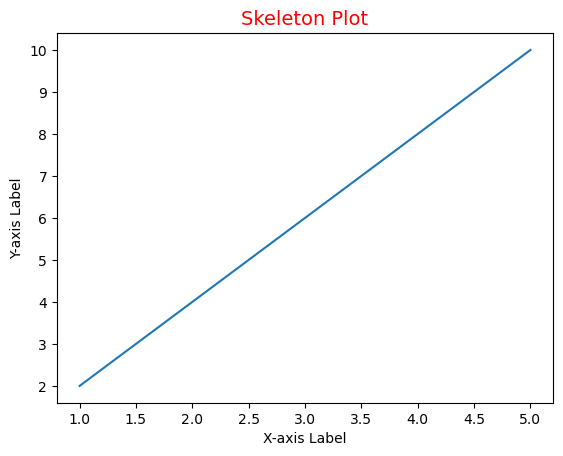

In [2]:
%matplotlib inline

# 맷플롯립 임포트하기
import matplotlib.pyplot as plt

# 데이터 준비하기 (x축과 y축 데이터)
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# 그래프 그리기
plt.plot(x, y)  # 그래프의 종류에 따라 다양한 메서드가 있음

# 그래프에 제목과 축 레이블 추가하기
plt.title("Skeleton Plot", 
          fontsize=14, 
          color='red')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# 그래프 보여주기
plt.show()

#### 선 그래프 (Line Plot)
- 선그래프의 특징
    - 데이터 포인트들이 선으로 연결
    - 시간, 순서 등 연속된 변수에 따른 값을 시각화하는 데 주로 사용
    - 추세나 패턴을 확인하기 위해 사용
- 장점
    - 시간의 흐름에 따른 추세나 변화를 직관적으로 파악하기 좋음
    - 여러 데이터 시리즈 간의 비교가 용이
    - 중간의 값들에 대한 추정이 가능 (보간)
- 단점
    - 데이터가 너무 많으면 복잡해 보일 수 있음
    - 카테고리 데이터나 개별적인 값들을 비교하기에는 부적합
    - 잘못된 스케일 또는 축 설정 시 오해를 초래할 수 있음
    - 데이터 간의 관계가 선형적이지 않은 경우 왜곡될 수 있음

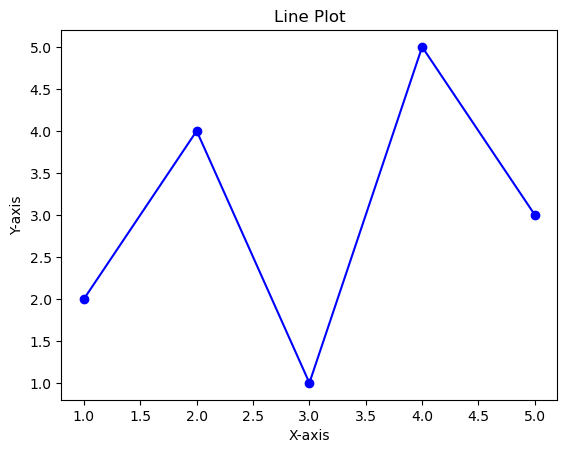

In [3]:
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 5, 3]

plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot')
plt.show()

#### 산점도 그래프 (Scatter Plot)
- 산점도 그래프의 특징
    - 두 변수 간의 관계를 포인트로 표시
    - 각 축은 하나의 수량적 변수를 나타냄
    - 데이터 포인트의 분포로 변수 간의 관계 파악
- 장점
    - 두 변수 사이의 관계나 상관관계 확인 용이
    - 이상치 탐지 용이
    - 데이터의 분포와 밀도 파악 가능
- 단점
    - 많은 데이터 포인트가 겹쳐 있을 때 해석 어려움
    - 선형적이지 않은 관계의 시각화에 한계
    - 두 변수 이상의 관계를 나타내기에 제한

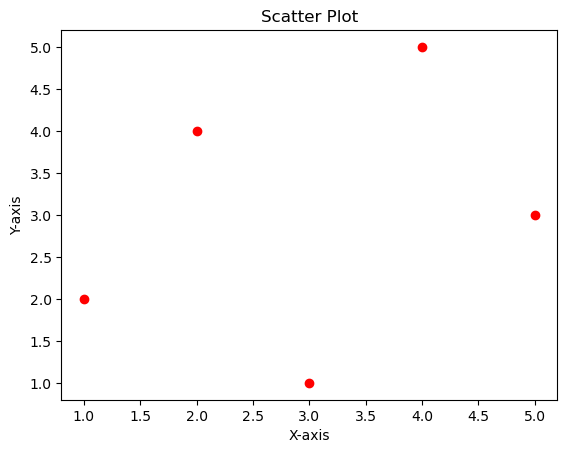

In [4]:
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 5, 3]

plt.scatter(x, y, marker='o', color='r')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')
plt.show()

#### 막대 그래프
- 막대 그래프 특징:
    - 수직 또는 수평 막대로 데이터 값을 표현
    - 각 막대는 카테고리나 항목을 나타냄
    - 막대의 길이로 값의 크기를 표시
- 장점:
    - 카테고리 간의 비교가 쉬움
    - 값의 차이를 직관적으로 파악 가능
    - 순서나 크기를 기준으로 정렬 가능
- 단점:
    - 너무 많은 카테고리가 있을 때 복잡해 보임
    - 연속적인 데이터나 추세를 표현하기에는 부적합
    - 세부적인 값의 차이를 정확히 알아보기 어려움

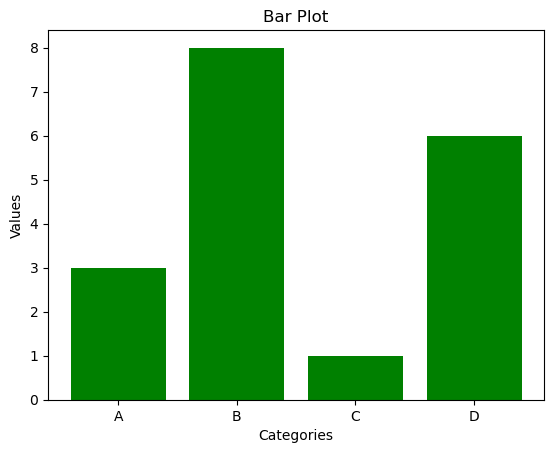

In [5]:
x = ['A', 'B', 'C', 'D']
y = [3, 8, 1, 6]

plt.bar(x, y, color='g')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Plot')
plt.show()

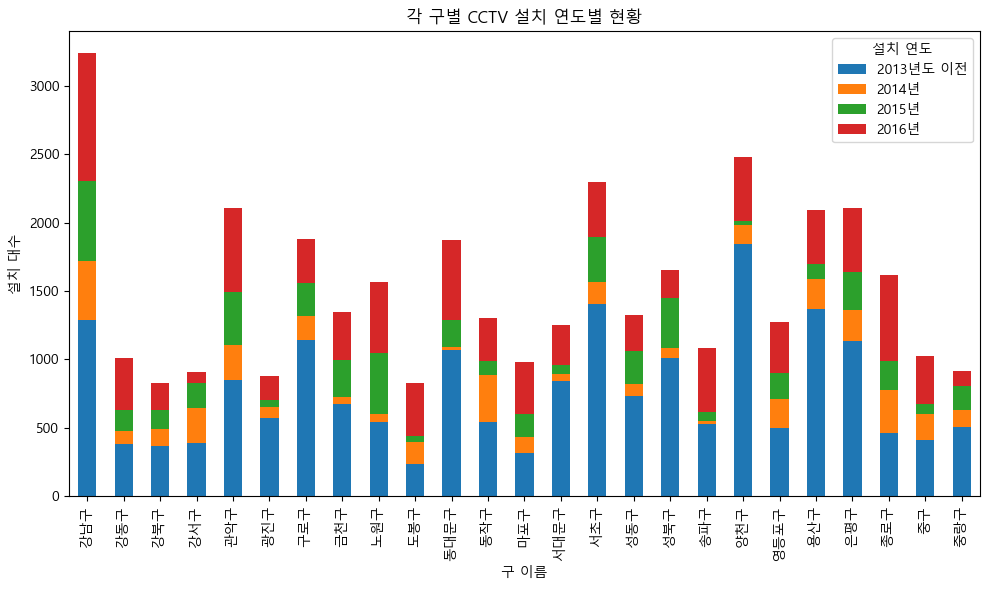

In [6]:
# 보너스: Stacked BarChart
import pandas as pd
plt.rcParams['font.family'] = 'Malgun Gothic'
df = pd.read_csv('../data/01. CCTV_in_Seoul.csv', encoding='utf-8')

df.set_index('기관명', inplace=True)

df.drop('소계', axis=1, inplace=True)
df.head()
df.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title("각 구별 CCTV 설치 연도별 현황")
plt.ylabel('설치 대수')
plt.xlabel('구 이름')
plt.legend(title='설치 연도')
plt.tight_layout()
plt.show()

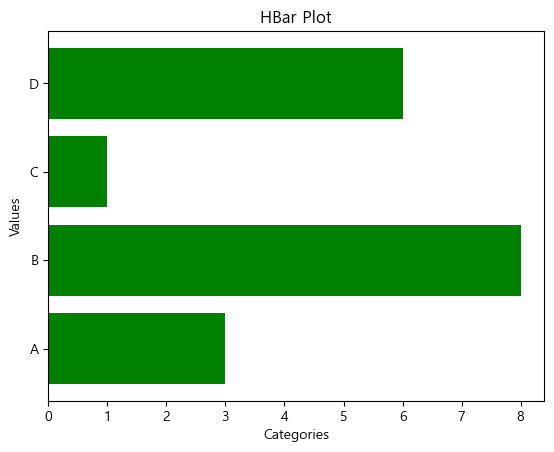

In [7]:
plt.barh(x, y, color='g')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('HBar Plot')
plt.show()

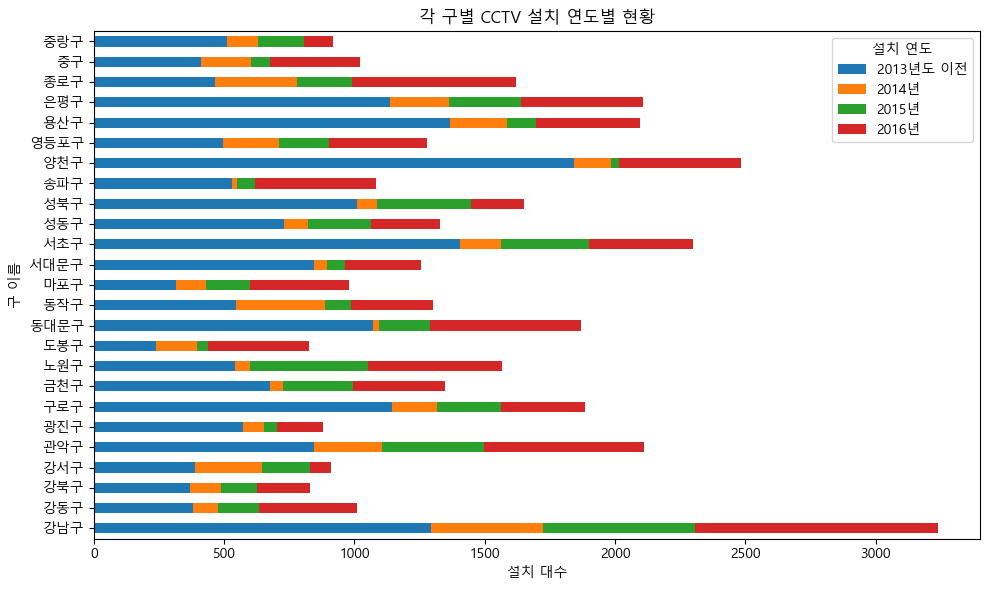

In [8]:
# 보너스: Stacked BarChart
import pandas as pd
plt.rcParams['font.family'] = 'Malgun Gothic'
df = pd.read_csv('../data/01. CCTV_in_Seoul.csv', encoding='utf-8')

df.set_index('기관명', inplace=True)

df.drop('소계', axis=1, inplace=True)
df.head()
df.plot(kind='barh', stacked=True, figsize=(10, 6)) # kind='barh' 가로로

plt.title("각 구별 CCTV 설치 연도별 현황")
plt.xlabel('설치 대수')
plt.ylabel('구 이름')
plt.legend(title='설치 연도')
plt.tight_layout()
plt.show()

### 다양한 차트
#### Pie Chart
- 파이차트의 특징
    - 원 형태로 각 부분이 전체 중 차지하는 비율을 표시
    - 항목들의 상대적인 크기를 비교하기 위해 사용
    - 각 슬라이스는 전체 중 특정 부분을 나타냄
    - 주로 카테고리 데이터의 분포를 보여줄 때 사용
- 장점
    - 직관적이며 시각적으로 눈에 잘 들어옴
    - 소수의 카테고리를 비교할 때 효과적
    - 전체에 대한 각 부분의 상대적인 비율을 쉽게 이해할 수 있음
- 단점
    - 많은 카테고리나 부분이 있을 경우 읽기 어려움
    - 슬라이스 간의 상대적 크기 차이를 정확하게 판단하기 어려움
    - 0에 가까운 작은 값들을 표현하기에 어려움이 있음
    - 다른 차트(예: 막대 그래프)에 비해 절대값이나 정확한 비율을 알아보기 어려울 수 있음

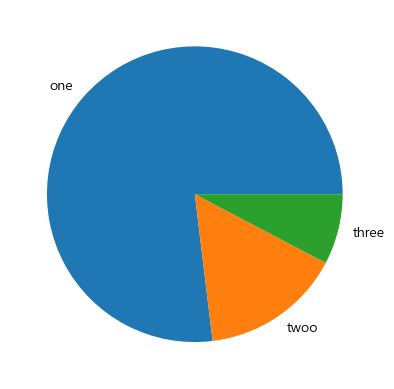

In [9]:
### Pie Chart

labels = ['one', 'twoo', 'three']
size = [100, 20, 10]

plt.pie(size, labels=labels)
plt.show()


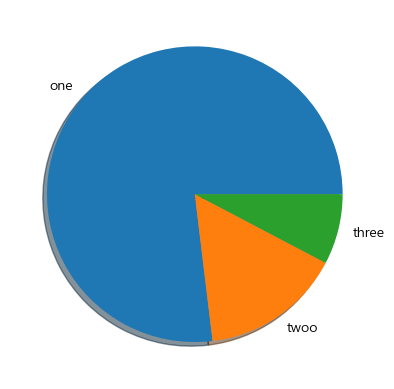

In [10]:
labels = ['one', 'twoo', 'three']
size = [100, 20, 10]

plt.pie(size, labels=labels, shadow=True)  # shadow 그림자표시
plt.show()

#### 히스토그램
- 히스토그램 특징:
    - 연속된 수량적 데이터를 범위별로 나누어 표현
    - 각 범위는 bin 또는 bucket이라 불림
    - 각 bin의 높이는 해당 범위에 속하는 데이터의 빈도나 개수를 나타냄
- 장점:
    - 데이터의 분포와 중심 경향 파악 용이
    - 이상치와 편향성 확인 가능
    - 데이터의 분산과 변동성 파악 가능
- 단점:
    - bin의 크기와 시작점에 따라 모양이 달라질 수 있음
    - 두 변수 간의 관계나 상관관계를 직접적으로 보여주지 못함
    - 카테고리 데이터를 표현하기에는 부적합

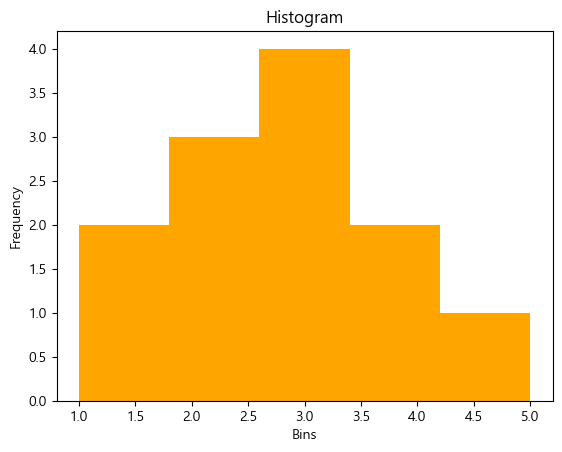

In [11]:
data = [1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5]

plt.hist(data, bins=5, color='orange')  # bins=5 구간정보를 5개 구간으로 나눈다
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

### 그래프 스타일 설정
- 그래프의 제목, 축 레이블, 범례 등 설정:
    - plt.title() : 그래프의 제목을 설정
    - plt.xlabel() : X축의 레이블을 설정
    - plt.ylabel() : Y축의 레이블을 설정
    - plt.legend() : 범례를 추가
- 색상, 선 스타일, 마커 설정:
    - color : 그래프의 색상을 설정
    - linestyle : 선의 스타일을 설정하는 옵션 ('-'. '--', ':', '-.')
    - linewidth : 선의 두께를 설정하는 옵션
    - marker :데이터포인트를 표시하는 마커 모양을 설정
- 텍스트와 주석 추가
    - plt.text() : 그래프 내 특정 위치에 텍스트를 추가하는 함수
    - plt.annotate() : 그래프 내 특정 데이터포인트에 주석을 추가하는 함수

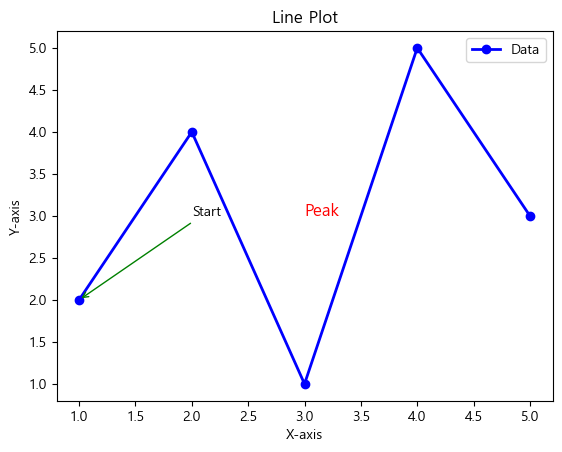

In [17]:
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 5, 3]

plt.plot(x, y, marker='o', linestyle='-', color='b', linewidth=2)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot')
plt.legend(['Data'])
plt.text(3, 3, 'Peak', fontsize=12, color='red')
plt.annotate('Start', xy=(1, 2),  # 포인트위치
             xytext=(2, 3),  # 텍스트위치
             arrowprops=dict(arrowstyle='->', color='green'))
plt.show()

### 다중 서브플롯
- 데이터 시각화에서 여러 개의 그래프를 한 번에 그리는 것은 데이터를 비교하거나 관계를 파악하는데 도움이 됨
- 맷플롯립에서는 다중 서브 플롯을 그리기 위해 두 가지 함수를 제공
    - subplot() 함수
    - subplots() 함수

##### subplot 함수 활용
- subplot() 함수 : 하나의 그림 안에 여러 개의 서브플롯을 배열 형태로 배치하는 방법

In [13]:
import seaborn as sns
anscombe = sns.load_dataset("anscombe")
# anscombe
ds1 = anscombe[anscombe['dataset'] == 'I']
ds2 = anscombe[anscombe['dataset'] == 'II']
ds3 = anscombe[anscombe['dataset'] == 'III']
ds4 = anscombe[anscombe['dataset'] == 'IV']

# 기존 통계학의 가정: 평균과 분산이 같으면 같은 데이터셋
# 엔스콤 : 평균과 분산이 같아도 데이터는 다를 수 있다는 것을 보여줌 -> 시각화의 중요성
ds1.describe()
ds2.describe()
ds3.describe()
ds4.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


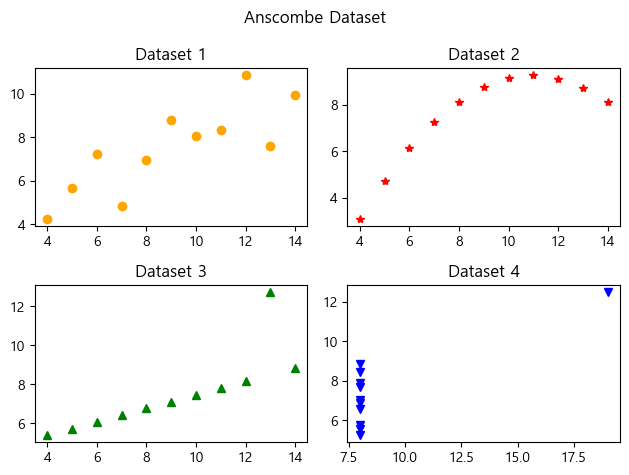

In [18]:
plt.subplot(2, 2, 1) # 2행 2열 중 1번째 위치에 서브플롯 생성
plt.plot(ds1.x, ds1.y, 'o', color='orange')
plt.title('Dataset 1')

plt.subplot(2, 2, 2) # 2행 2열 중 2번째 위치에 서브플롯 생성
plt.plot(ds2['x'], ds2['y'], '*', color='red')
plt.title('Dataset 2')

# plt.subplot(2, 2, 3) # 2행 2열 중 3번째 위치에 서브플롯 생성
plt.subplot(223) # 2행 2열 중 3번째 위치에 서브플롯 생성
plt.plot(ds3.x, ds3.y, '^', color='green')
plt.title('Dataset 3')

# plt.subplot(2, 2, 4) # 2행 2열 중 4번째 위치에 서브플롯 생성
plt.subplot(224) # 2행 2열 중 4번째 위치에 서브플롯 생성
plt.plot(ds4['x'], ds4['y'], 'v', color='blue')
plt.title('Dataset 4')

plt.suptitle('Anscombe Dataset') # 전체 그림에 제목 추가
plt.tight_layout() # 서브플롯 간 간격 조정
plt.show()

##### subplots 함수 활용
- 여러 개의 서브플롯을 한번에 생성하고 반환

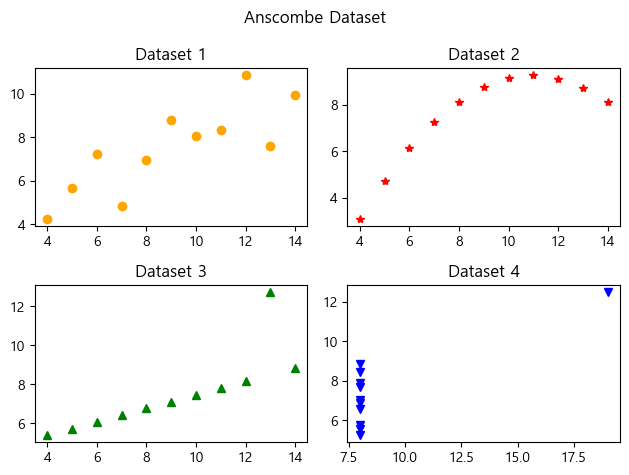

In [15]:
fig, axes = plt.subplots(2, 2) # 2행 2열의 서브플롯 생성

axes[0, 0].plot(ds1.x, ds1.y, 'o', c='orange')
axes[0, 0].set_title('Dataset 1')

axes[0, 1].plot(ds2.x, ds2.y, '*', color='red')
axes[0, 1].set_title('Dataset 2')

axes[1, 0].plot(ds3.x, ds3.y, '^', color='green')
axes[1, 0].set_title('Dataset 3')

axes[1, 1].plot(ds4.x, ds4.y, 'v', color='blue')
axes[1, 1].set_title('Dataset 4')

plt.suptitle('Anscombe Dataset') # 전체 그림에 제목 추가
plt.tight_layout() # 서브플롯 간 간격 조정
plt.show()

### 선 색상과 스타일
- 공식문서: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot
- 공식문서: https://matplotlib.org/stable/api/pyplot_summary.html